In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/iris.csv')#꽃임/꽃받침의 폭과 길이, 그리고 종(답안)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#시각화를 먼저해서, 인사이트를 얻기 -- 어떻게 Feature Engineering을 진행할지 감을 찾는것
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

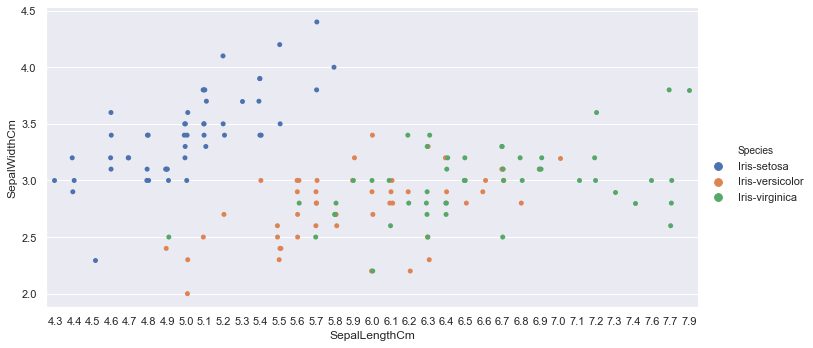

In [6]:
sns.catplot(data = df, x = 'SepalLengthCm', y='SepalWidthCm', hue = 'Species', aspect = 2)
#별로 없어보이는 연관성..?

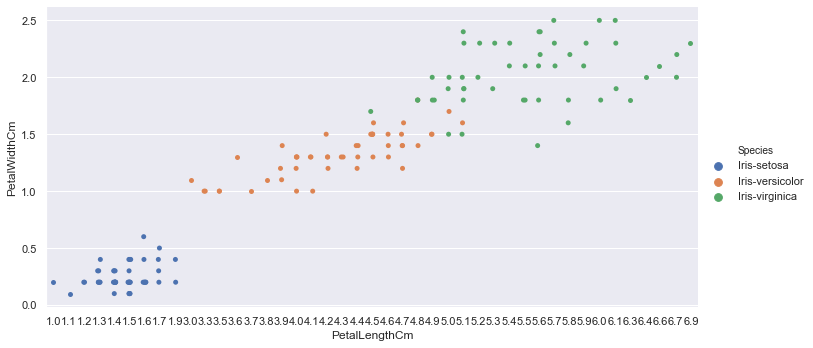

In [7]:
sns.catplot(data = df, x = 'PetalLengthCm', y='PetalWidthCm', hue = 'Species', aspect = 2)
#쫌 더 뚜렷하게 나타나는 data -- 이 두 변수를 좀 더 조사하자

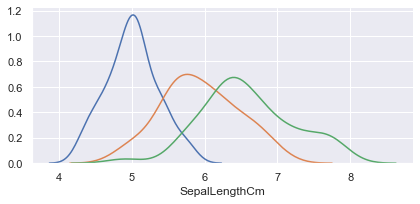

In [10]:
facet = sns.FacetGrid(df, hue = "Species", aspect = 2) #보통 답안을 hue로 놓고 비교하는 것이다
facet.map(sns.kdeplot, 'SepalLengthCm')
facet.add_legend() #색깔별 이름 표시 를 첨가

#매끈한 곡선 그래프
plt.show()

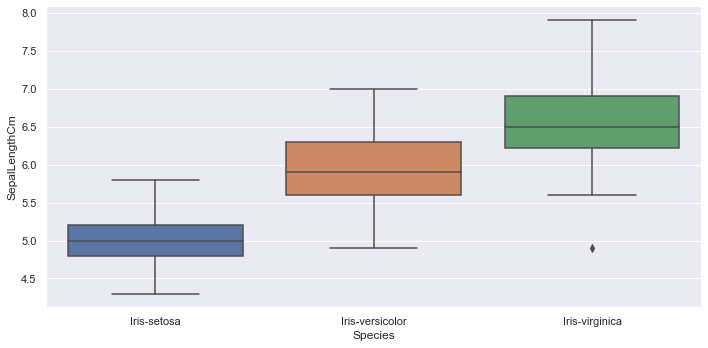

In [11]:
sns.catplot(kind = 'box', data = df, x = 'Species', y='SepalLengthCm', aspect =2)
#SepalLengthCm를 좀 더 조사 이 경우(boxplot) x값에 답안을 두고, 

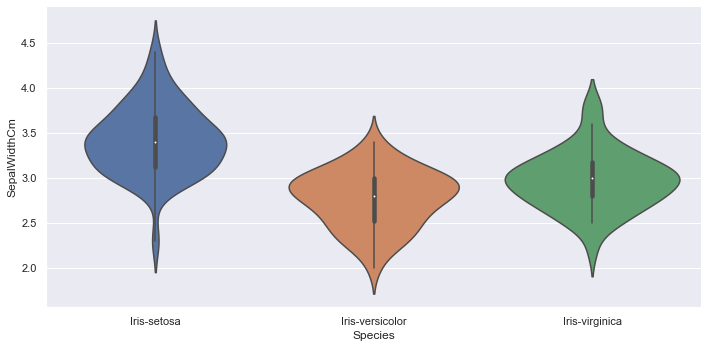

In [12]:
sns.catplot(kind = 'violin', data = df, x = 'Species', y='SepalWidthCm', aspect =2)
#SepalWidth를 더 조사

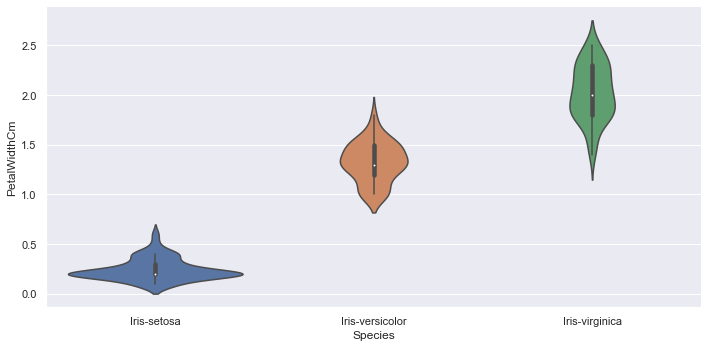

In [14]:
sns.catplot(kind = 'violin', data = df, x = 'Species', y='PetalWidthCm', aspect =2)
#역시, PetalWidthCm 가 더 확연한 차이를 보이는 것으로 나타남..!

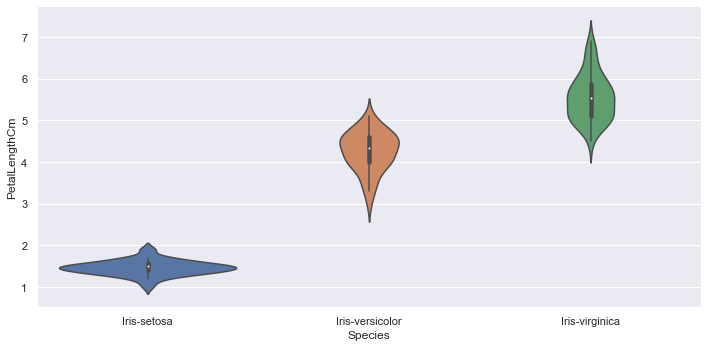

In [15]:
sns.catplot(kind = 'violin', data = df, x = 'Species', y='PetalLengthCm', aspect =2)
#SepalLength 역시 그러함

In [16]:
"""sklearn으로 RandomForest 직접 구현하기ㅎ -- 아까는 DecisionTree를 단순히 평균내는 것으로 구했다면, 아예 코드로 모든 것을 더 많이, 더 효율적으로 학습시키는 것"""

'sklearn으로 RandomForest 직접 구현하기ㅎ -- 아까는 DecisionTree를 단순히 평균내는 것으로 구했다면, 아예 코드로 모든 것을 더 많이, 더 효율적으로 학습시키는 것'

In [24]:
from sklearn.model_selection import train_test_split

input_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target_data = df['Species']

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
80,5.5,2.4,3.8,1.1
25,5.0,3.0,1.6,0.2
92,5.8,2.6,4.0,1.2
63,6.1,2.9,4.7,1.4
40,5.0,3.5,1.3,0.3
...,...,...,...,...
121,5.6,2.8,4.9,2.0
17,5.1,3.5,1.4,0.3
76,6.8,2.8,4.8,1.4
60,5.0,2.0,3.5,1.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print("training_test_accuracy: ", tree.score(x_train, y_train))
print("test_set_accuracy : ", tree.score(x_test, y_test))

training_test_accuracy:  1.0
test_set_accuracy :  0.9210526315789473


In [26]:
prediction = tree.predict(x_test)
prediction

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [29]:
#바로 랜덤 포레스트--앙상블기법
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(x_train, y_train)

print('training: ', forest.score(x_train,y_train))
print('test: ', forest.score(x_test, y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest
#앞선 DecisionTree보다 확률이 더 올라간 것을 알 수 있음

training:  1.0
test:  0.9210526315789473


array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)